## Objectives

Importing required libraries/modules:

In [1]:
#libraries to manipulate and calculate :
import os
import pandas as pd
import numpy as np
from datetime import datetime

#Libraries for visualisation:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#Modules/Functions for metrics:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Modules for pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#Module to impute
from sklearn.impute import SimpleImputer

#Module to split to data
from sklearn.model_selection import train_test_split

#Module for standardisation
from sklearn.preprocessing import StandardScaler

#Module for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Libraries for ML model_building:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

#Module for OverSampling
from imblearn.over_sampling import SMOTE

#library for Tuning models:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
%matplotlib inline

#Module to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

##Limiting floats output to 3 decimal points 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To get current working directory

In [2]:
os.getcwd()

'C:\\Users\\chiru\\Insofe Python Files\\Final_MITH'

## Load data.

Load data and create dataframe.

Initial data analysis.

In [126]:
#Read the given datasets
train_data = pd.read_csv('train_data-1599717478076.csv',na_values=[" ","na","NA"])
test_data = pd.read_csv('test_data-1599717650029.csv',na_values=[" ","na","NA"])


In [4]:
train_data.shape, test_data.shape

((76529, 11), (19133, 10))

Copied the datasets for future purpose

In [5]:
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

### Exploring the data

In [6]:
# What are the data types?
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [7]:
# What is the distribution of numerical columns
train_data.describe()

transaction_number      user_id  partner_id  money_transacted  \
count            76529.000    76529.000   76529.000         76529.000   
mean   694019979612230.750 12474830.142   58497.189           132.724   
std    786788520201862.000 12058784.190   36740.217          2350.111   
min                  8.000        1.000    7889.000        -20000.000   
25%     43878656207511.000  3515625.000   23667.000            -1.000   
50%    345254019471577.000  9753129.000   47334.000            20.000   
75%   1173440179290176.000 17884441.000   78890.000            52.000   
max   2784237895441241.000 55920484.000  213003.000        197217.760   

       partner_pricing_category  is_fraud  
count                 76529.000 76529.000  
mean                      2.256     0.002  
std                       0.732     0.045  
min                       0.000     0.000  
25%                       2.000     0.000  
50%                       2.000     0.000  
75%                       2.000     0.000  
max                       4.000     1.000

In [8]:
# What about categorical variable levels count
train_data.describe(include=['object'])

payment_method partner_category  country device_type  \
count                    76529            76529    76529       76529   
unique                       6                9        1           4   
top     sbi_atm_cum_debit_card            cat_1  IND_INR   other_pcs   
freq                     30538            36306    76529       45560   

           transaction_initiation  
count                       76529  
unique                      75811  
top     2016-12-24 16:30:13+00:00  
freq                           12

In [9]:
#Get uniques values in attributes
train_data.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

Distribution of dependent variable

In [10]:
#Distribution of dependent variable
train_data.is_fraud.value_counts(normalize=True)*100

0   99.799
1    0.201
Name: is_fraud, dtype: float64

In [11]:
#Glancing the head of the dataset
train_data.head()

transaction_number   user_id          payment_method  partner_id  \
0        144703125000  17539344  sbi_atm_cum_debit_card       47334   
1      77406814453032  24710841       e_wallet_payments       78890   
2     308929485482801  24265476       e_wallet_payments       78890   
3     665270027747073  10240000       other_debit_cards      102557   
4      38276160171101   5880625       other_debit_cards      118335   

  partner_category  country      device_type  money_transacted  \
0            cat_1  IND_INR  android_devices            -5.000   
1            cat_2  IND_INR        other_pcs           100.000   
2            cat_2  IND_INR        other_pcs            50.000   
3            cat_3  IND_INR        other_pcs          1000.000   
4            cat_1  IND_INR        other_pcs           200.000   

      transaction_initiation  partner_pricing_category  is_fraud  
0  2016-11-15 19:16:12+00:00                         2         0  
1  2017-01-11 09:25:33+00:00                         2         0  
2  2016-12-07 07:58:09+00:00                         2         0  
3  2017-01-11 16:15:44+00:00                         2         0  
4  2016-11-16 17:04:42+00:00                         2         0

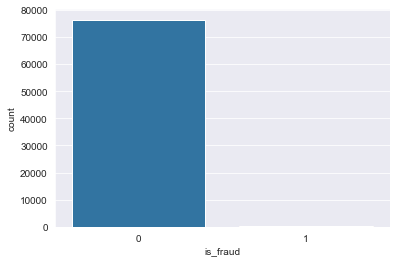

0    76375
1      154
Name: is_fraud, dtype: int64
Percentage of people who have taken the campaign: 50.0 %


In [12]:
# Plot Distribution of Target
sns.countplot(x='is_fraud',data=train_data)
plt.show()

# What are the counts?
print(train_data.is_fraud.value_counts())

# What is the percentage?
count_yes = len(train_data[train_data.is_fraud == 1])
count_no = len(train_data[train_data.is_fraud != 0])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of people who have taken the campaign:', percent_success, "%")

In [13]:
train_data.head()

transaction_number   user_id          payment_method  partner_id  \
0        144703125000  17539344  sbi_atm_cum_debit_card       47334   
1      77406814453032  24710841       e_wallet_payments       78890   
2     308929485482801  24265476       e_wallet_payments       78890   
3     665270027747073  10240000       other_debit_cards      102557   
4      38276160171101   5880625       other_debit_cards      118335   

  partner_category  country      device_type  money_transacted  \
0            cat_1  IND_INR  android_devices            -5.000   
1            cat_2  IND_INR        other_pcs           100.000   
2            cat_2  IND_INR        other_pcs            50.000   
3            cat_3  IND_INR        other_pcs          1000.000   
4            cat_1  IND_INR        other_pcs           200.000   

      transaction_initiation  partner_pricing_category  is_fraud  
0  2016-11-15 19:16:12+00:00                         2         0  
1  2017-01-11 09:25:33+00:00                         2         0  
2  2016-12-07 07:58:09+00:00                         2         0  
3  2017-01-11 16:15:44+00:00                         2         0  
4  2016-11-16 17:04:42+00:00                         2         0

In [14]:
test_data.head()

transaction_number   user_id            payment_method  partner_id  \
0     857050141038272   3802500   visa_master_debit_cards      118335   
1       4400462872603    200704         e_wallet_payments       23667   
2    1207915598569499  25150225    sbi_atm_cum_debit_card       47334   
3    2009725616777536  21827584  visa_master_credit_cards       78890   
4    2319205210274863    576081         e_wallet_payments       23667   

  partner_category  country      device_type  money_transacted  \
0            cat_1  IND_INR        other_pcs           200.000   
1            cat_2  IND_INR        other_pcs            20.000   
2            cat_1  IND_INR  android_devices          -100.000   
3            cat_2  IND_INR        other_pcs           200.000   
4            cat_2  IND_INR        other_pcs           100.000   

      transaction_initiation  partner_pricing_category  
0  2016-12-28 14:44:37+00:00                         2  
1  2016-12-14 17:49:48+00:00                         2  
2  2017-01-21 10:18:11+00:00                         2  
3  2017-01-16 13:25:10+00:00                         1  
4  2017-02-09 12:47:28+00:00                         2

In [15]:
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [16]:
test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

# Finding missing/null values

In [17]:
#To determine the missing/null values in the data
def Missing (X):
    total = X.isnull().sum().sort_values(ascending = False)
    percent = round(X.isnull().sum().sort_values(ascending = False)/len(X)*100, 2)
    missing = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return(missing) 

In [18]:
#Missing/null values in each dataset
print('missing in train_data:\n',Missing(train_data),'\n')
print('missing in unseen_data:\n',Missing(test_data),'\n')

missing in train_data:
                           Total  Percent
is_fraud                      0    0.000
partner_pricing_category      0    0.000
transaction_initiation        0    0.000
money_transacted              0    0.000
device_type                   0    0.000
country                       0    0.000
partner_category              0    0.000
partner_id                    0    0.000
payment_method                0    0.000
user_id                       0    0.000
transaction_number            0    0.000 

missing in unseen_data:
                           Total  Percent
partner_pricing_category      0    0.000
transaction_initiation        0    0.000
money_transacted              0    0.000
device_type                   0    0.000
country                       0    0.000
partner_category              0    0.000
partner_id                    0    0.000
payment_method                0    0.000
user_id                       0    0.000
transaction_number            0    0.000 



We observe no null values

In [19]:
train_data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

Dropping irrelevaent columns and setting the index

# Categorical and Numerical attributes

In [20]:
train_data.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [21]:
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [22]:
train_data['payment_method'] = train_data['payment_method'].astype('category')
train_data['partner_id'] = train_data['partner_id'].astype('category')
train_data['partner_category'] = train_data['partner_category'].astype('category')
train_data['device_type'] = train_data['device_type'].astype('category')
train_data['partner_pricing_category'] = train_data['partner_pricing_category'].astype('category')
train_data['is_fraud'] = train_data['is_fraud'].astype('category')


In [ ]:
#num_col = train_data.select_dtypes(exclude=['category']).columns
#num_col

In [ ]:
#cat_col=train_data.select_dtypes(include=['category']).columns
#cat_col.drop(['is_fraud'])

In [127]:
test_data['payment_method'] = test_data['payment_method'].astype('category')
test_data['partner_id'] = test_data['partner_id'].astype('category')
test_data['partner_category'] = test_data['partner_category'].astype('category')
test_data['device_type'] = test_data['device_type'].astype('category')
test_data['partner_pricing_category'] = test_data['partner_pricing_category'].astype('category')

In [ ]:
#test_num_col = test_data.select_dtypes(exclude=['category']).columns
#test_num_col

In [ ]:
#test_cat_col=train_data.select_dtypes(include=['category']).columns
#test_cat_col

### Feature extraction

In [24]:
#Extracting year and month from transaction_initiation

train_data['Date']=pd.to_datetime(train_data['transaction_initiation']).dt.date
train_data['Time']=pd.to_datetime(train_data_copy['transaction_initiation']).dt.time
train_data['Day']=pd.to_datetime(train_data['Date']).dt.day
train_data['Day']= train_data['Day'].astype('category')

In [25]:
train_data['Date']= train_data['Date'].astype('category')
train_data['year'] = pd.DatetimeIndex(train_data['Date']).year
train_data['month'] = pd.DatetimeIndex(train_data['Date']).month
train_data['month']= train_data['month'].astype('category')
train_data['year']= train_data['year'].astype('category')

In [128]:
test_data['Date']=pd.to_datetime(test_data['transaction_initiation']).dt.date

In [129]:
test_data['Time']=pd.to_datetime(test_data['transaction_initiation']).dt.time
test_data['Day']=pd.to_datetime(test_data['Date']).dt.day
test_data['Day']= test_data['Day'].astype('category')
test_data['year'] = pd.DatetimeIndex(test_data['Date']).year
test_data['month'] = pd.DatetimeIndex(test_data['Date']).month
test_data['month']= test_data['month'].astype('category')
test_data['year']= test_data['year'].astype('category')

### Dropping irrelevaent columns

In [ ]:
#test_data.set_index('transaction_number',inplace=True)
#train_data.set_index('transaction_number',inplace=True)

In [130]:
train_data.drop(['country'],axis=1,inplace=True)
train_data.drop(['transaction_initiation'],axis=1,inplace=True)
test_data.drop(['country'],axis=1,inplace=True)
test_data.drop(['transaction_initiation'],axis=1,inplace=True)
train_data.drop(['Date'],inplace=True,axis=1)
train_data.drop(['Time'],inplace=True,axis=1)
test_data.drop(['Date'],inplace=True,axis=1)
test_data.drop(['Time'],inplace=True,axis=1)
train_data.drop(['user_id'],inplace=True,axis=1)
test_data.drop(['user_id'],inplace=True,axis=1)
train_data.drop(['transaction_number'],inplace=True,axis=1)
test_data.drop(['transaction_number'],inplace=True,axis=1)

In [38]:
train_data.dtypes

payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
Day                         category
year                        category
month                       category
dtype: object

In [131]:
test_data.dtypes

payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
Day                         category
year                        category
month                       category
dtype: object

In [39]:
num_col=train_data.select_dtypes(exclude=['category']).columns
num_col

Index(['money_transacted'], dtype='object')

In [40]:
cat_col=train_data.select_dtypes(include=['category']).columns
cat_col

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'partner_pricing_category', 'is_fraud', 'Day', 'year', 'month'],
      dtype='object')

# Split data into train and test sets

- Use `train_test_split` method from `sklearn.model_selection` module.

In [165]:
#Splitting the data
from sklearn.model_selection import train_test_split  
X_train=train_data.drop(['is_fraud'], axis='columns')
y_train = train_data['is_fraud']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                    y_train, 
                                                   train_size=0.7, 
                                                    test_size=0.3,
                                                    random_state=0)

In [166]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((53570, 9), (22959, 9), (53570,), (22959,))

In [35]:
test_data.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'Day', 'year', 'month'],
      dtype='object')

## Visualization

Get Correlations between the columns

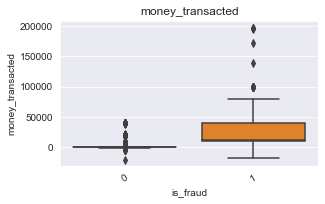

In [176]:
fig=plt.figure(figsize=(12,24))
fig.subplots_adjust(wspace=0.6,hspace=1)
num_columns=train_data.select_dtypes(exclude=['category','object']).columns

for i,value in enumerate(num_columns):
    plt.subplot(5,2,i+1)
    plt.xticks(rotation=30)
    plt.title(value)
    sns.boxplot(x='is_fraud',y=value,data=train_data)
plt.show()

From the above plot, if the amount is huge then there is high probability that it would become a fraudlent transaction.

<Figure size 1440x576 with 0 Axes>

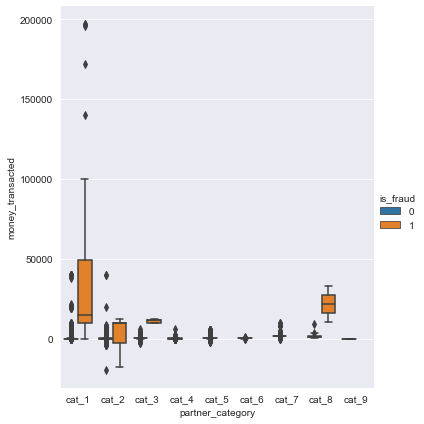

In [210]:
plt.figure(figsize = (20,8))
g = sns.catplot(x="partner_category", y="money_transacted",
                hue="is_fraud",
                data=train_data, kind="box",
                height=6, aspect=.9);

From the above graph, cat1 got huge amount of money transacted than cat2 which are fraudulent transaction in partner_category and cat_8 also has more fraudlent transaction. Client must focus on these 3 partner_category.

<Figure size 504x504 with 0 Axes>

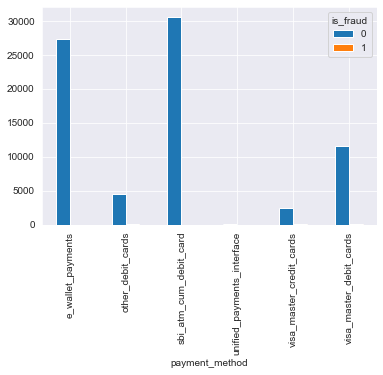

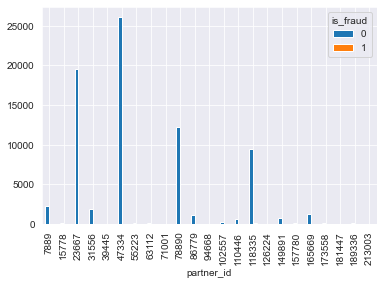

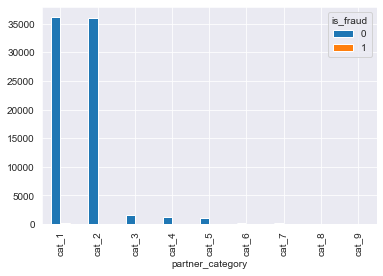

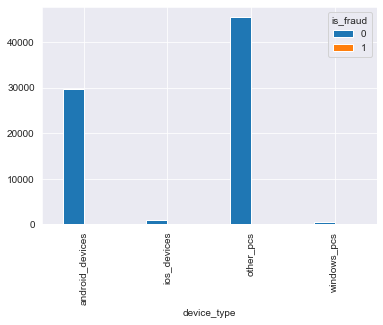

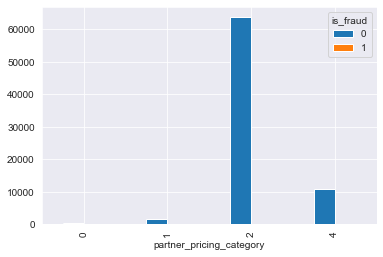

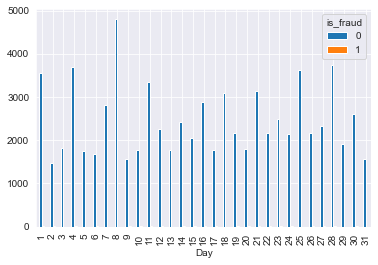

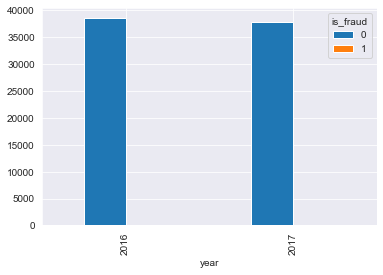

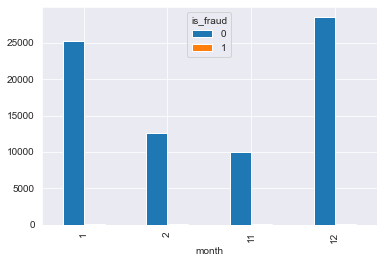

In [215]:
#target distribution in categorical columns 
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.5,hspace=1)

cat_cols2 = cat_col[5:]
for value in cat_col:
    if value!= 'is_fraud':
        data_plot=pd.crosstab(train_data[value],train_data['is_fraud'])
        #print(data_plot)
        data_plot.plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()

To check train and valid target distribution

In [216]:
X_train.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'Day', 'year', 'month'],
      dtype='object')

Other categorical columns distribution with respect to the target.

In [ ]:
cat_col

<AxesSubplot:xlabel='partner_id', ylabel='count'>

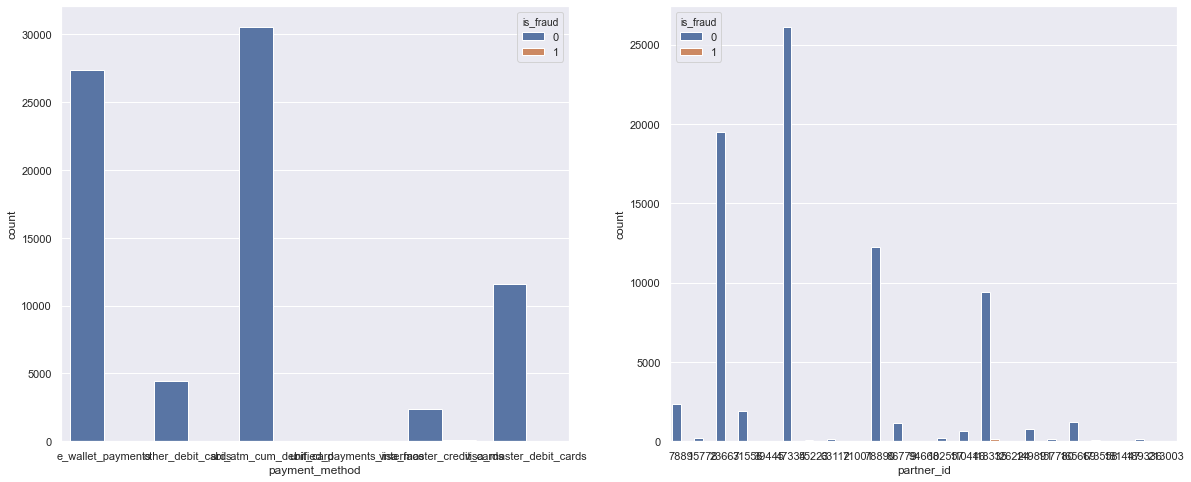

In [221]:
# for col in categorical_columns:
#     if col!='went_on_backorder':
#         sns.countplot(x = col, hue='went_on_backorder',data = plot_data)
#         plt.show()


fig, axs = plt.subplots(nrows = 1, ncols=2)
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(x = cat_col[0], hue='is_fraud', data = train_data, ax=axs[0])
sns.countplot(x = cat_col[1], hue='is_fraud', data = train_data, ax=axs[1])


Other columns distribution based on the target.

In [ ]:
import plotly.express as px
fig = px.bar(train_data, y="Sex", x="partner_category",color='Left_Company')
fig

In [209]:
fig = px.bar(train_data, y="money_transacted", x="partner_category",color='device_type')
fig

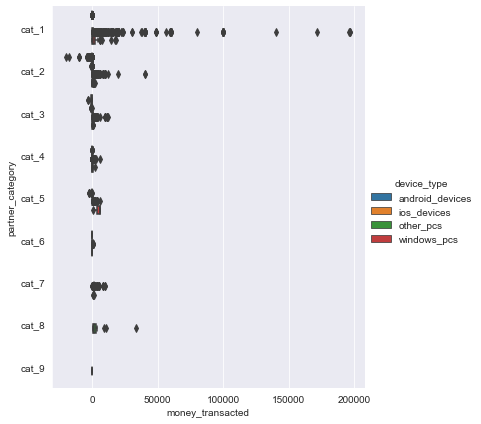

In [207]:
sns.catplot(x="money_transacted", y="partner_category",
                hue="device_type",
                data=train_data, kind="box",
                height=6, aspect=.9);

# Pipeline

### Classes used in Pipeline

- Use `SimpleImputer` class from `sklearn.impute` module,impute with the median for numeric columns and with mode for categorical columns
- Use `StandardScale` class from `sklearn.preprocessing` module to standardize the columns
- Use `OneHotEncoder` class from `sklearn.preprocessing` module to convert the categorical variables to the numerical variables

In [168]:
num_col = train_data.select_dtypes(exclude=['category']).columns
num_col

Index(['money_transacted'], dtype='object')

In [169]:
cat_col = train_data.select_dtypes(include=['category']).columns
cat_col=cat_col.drop('is_fraud')

In [79]:
# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_onehotencode', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_trf', numeric_transformer, num_col),
        ('cat_trf', categorical_transformer, cat_col)])



# OnehotEncoding

In [119]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_pp = pd.DataFrame(clf.fit_transform(X_train))
X_test_pp = pd.DataFrame(clf.transform(X_valid))

In [65]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cat_col]))
OH_cols_test  = pd.DataFrame(OH_encoder.transform(X_valid[cat_col]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_valid.index

# One-hot encoding assigns the sequence numbers as the columns names.
OH_cols_train.columns = OH_encoder.get_feature_names()
OH_cols_test.columns  = OH_encoder.get_feature_names()

# Add one-hot encoded columns to imputed numerical features
Final_X_train = pd.concat([X_train[num_col], OH_cols_train], axis=1)
Final_X_valid  = pd.concat([X_valid[num_col], OH_cols_test], axis=1)

# Compute metrics

- Compute accuracy, precision, recall and f1-score.
- Using functions accuracy_score,recall_score,precision_score,f1_score available in sklearn.metrics module.

In [96]:
# Function to append classification metrics into a dataframe
global Metric
Metric = pd.DataFrame(columns=['Model','Accuray','precision_class0','precision_class1','recall_class0','recall_class1','f1_class0','f1_class1'])

def Metric_append(model_name,y_train,train_pred):
    global Metric
    Metric = Metric.append(pd.Series([model_name,accuracy_score(y_train,train_pred), precision_score(y_train,train_pred,average = None)[0], 
                            precision_score(y_train,train_pred,average = None)[1],
                           recall_score(y_train,train_pred,average = None)[0],recall_score(y_train,train_pred,average = None)[1], 
                           f1_score(y_train,train_pred,average = None)[0],
                 f1_score(y_train,train_pred,average = None)[1]], index=Metric.columns ), ignore_index=True)

    return Metric

#Function for model evaluation
def model_evaluation(y_train, train_pred, y_test, pred_test):
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, train_pred))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================''')
    print(classification_report(y_test, pred_test))
    
    

# Model Building

In [66]:
#A function to fit a model and predict train and test values.
#It also calculates train and test error metrics and return the metrics.

def model_evaluation(models,train_x,train_y,test_x,test_y,Metric):
    #Evaluated_values={}
    cnt=0
    k=0
    for i in models:
        
        model_names=['logistic_train','logistic_test','NB_train','NB_test','KNN_train','KNN_test','DT_train','DT_test','RF_train','RF_test','Svc_train','Svc_test','XGB_train','XGB_test','GBM_train','GBM_test','LGBM_train','LGBM_test']
        #Fitting train values to model:
        i.fit(train_x,train_y)
        
        #Predicting values for train and test:
        pred_train=i.predict(train_x)
        pred_test=i.predict(test_x)
        
        #Calculating error metrics in train and test data:
        ##################################################
        
        Metric = Metric.append(pd.Series([model_names[k],accuracy_score(train_y,pred_train), precision_score(train_y,pred_train,average = None)[0], 
                            precision_score(train_y,pred_train,average = None)[1],
                           recall_score(train_y,pred_train,average = None)[0],recall_score(train_y,pred_train,average = None)[1], 
                           f1_score(train_y,pred_train,average = None)[0],
                 f1_score(train_y,pred_train,average = None)[1]], index=Metric.columns ), ignore_index=True)

        
        #For Train:
        cm_train=confusion_matrix(train_y,pred_train)
        class_report_train=classification_report(train_y,pred_train)
        prec_train=precision_score(train_y,pred_train)
        f1_train=f1_score(train_y,pred_train)
        accu_train=accuracy_score(train_y,pred_train)
        recall_train=recall_score(train_y,pred_train)
        
        #For Test:
        cm_test=confusion_matrix(test_y,pred_test)
        class_report_test=classification_report(test_y,pred_test)
        prec_test=precision_score(test_y,pred_test)
        f1_test=f1_score(test_y,pred_test)
        accu_test=accuracy_score(test_y,pred_test)
        recall_test=recall_score(test_y,pred_test)
        
        Metric = Metric.append(pd.Series([model_names[k+1],accuracy_score(test_y,pred_test), precision_score(test_y,pred_test,average = None)[0], 
                            precision_score(test_y,pred_test,average = None)[1],
                           recall_score(test_y,pred_test,average = None)[0],recall_score(test_y,pred_test,average = None)[1], 
                           f1_score(test_y,pred_test,average = None)[0],
                 f1_score(test_y,pred_test,average = None)[1]], index=Metric.columns ), ignore_index=True)

        #Printing model details and error values:
        
        print('\n\t\t\t\t Model %.0f '%(cnt+1))
        print('----------------------------------------------------------------------------')
        print(i,'\n\n')
        print('Train values : ')
        print('-------------- \n')
        print('Precision score  : ',prec_train,'\n')
        print('F1-score         : ',f1_train,'\n')
        print('Accuracy score   : ',accu_train,'\n')
        print('Recall score     : ',recall_train,'\n')
        print('Confusion matrix : \n')
        print(cm_train,'\n')
        print('Classification report : \n ')
        print(class_report_train,'\n')
        
        print('Test values : ')
        print('------------- \n')
        print('Precision score  : ',prec_test,'\n')
        print('F1-score         : ',f1_test,'\n')
        print('Accuracy score   : ',accu_test,'\n')
        print('Recall score     : ',recall_test,'\n')
        print('Confusion matrix :  \n')
        print(cm_test,'\n')
        print('Classification report : \n')
        print(class_report_test,'\n')
        k+=2
        cnt+=1
    return Metric
        

logistic=LogisticRegression(class_weight='balanced',random_state=123)
DT=DecisionTreeClassifier(min_samples_split=10,class_weight='balanced')
NB=GaussianNB()
GBM_model = GradientBoostingClassifier()
KNN=KNeighborsClassifier(weights='distance',n_neighbors = 3)
RF=RandomForestClassifier(n_jobs=-1,class_weight='balanced',n_estimators=10,max_depth=4,max_features='sqrt')
Svc=SVC(class_weight='balanced')
XGB=XGBClassifier(n_jobs=-1)
LGBM=LGBMClassifier()
metric=model_evaluation([logistic,NB,KNN,DT,RF,Svc,XGB,GBM_model,LGBM],Final_X_train,y_train,Final_X_valid,y_valid,Metric)


				 Model 1 
----------------------------------------------------------------------------
LogisticRegression(class_weight='balanced', random_state=123) 


Train values : 
-------------- 

Precision score  :  0.05516871987145153 

F1-score         :  0.10446247464503042 

Accuracy score   :  0.9670337875676684 

Recall score     :  0.9809523809523809 

Confusion matrix : 

[[51701  1764]
 [    2   103]] 

Classification report : 
 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     53465
           1       0.06      0.98      0.10       105

    accuracy                           0.97     53570
   macro avg       0.53      0.97      0.54     53570
weighted avg       1.00      0.97      0.98     53570
 

Test values : 
------------- 

Precision score  :  0.06056701030927835 

F1-score         :  0.11393939393939394 

Accuracy score   :  0.9681606341739623 

Recall score     :  0.9591836734693877 

Confusion matrix :  

[[22181   729]


In [67]:
metric

Model  Accuray  precision_class0  precision_class1  \
0   logistic_train    0.967             1.000             0.055   
1    logistic_test    0.968             1.000             0.061   
2         NB_train    0.914             1.000             0.022   
3          NB_test    0.915             1.000             0.024   
4        KNN_train    1.000             1.000             0.981   
5         KNN_test    1.000             1.000             0.865   
6         DT_train    1.000             1.000             0.897   
7          DT_test    0.999             1.000             0.754   
8         RF_train    0.951             1.000             0.037   
9          RF_test    0.949             1.000             0.038   
10       Svc_train    0.993             1.000             0.229   
11        Svc_test    0.991             1.000             0.179   
12       XGB_train    1.000             1.000             0.971   
13        XGB_test    1.000             1.000             0.932   
14       GBM_train    0.999             1.000             0.798   
15        GBM_test    0.999             1.000             0.710   
16      LGBM_train    0.993             0.999             0.091   
17       LGBM_test    0.991             0.999             0.082   

    recall_class0  recall_class1  f1_class0  f1_class1  
0           0.967          0.981      0.983      0.104  
1           0.968          0.959      0.984      0.114  
2           0.913          0.990      0.955      0.043  
3           0.915          1.000      0.955      0.048  
4           1.000          0.990      1.000      0.986  
5           1.000          0.918      1.000      0.891  
6           1.000          1.000      1.000      0.946  
7           0.999          0.878      1.000      0.811  
8           0.951          0.952      0.975      0.071  
9           0.949          0.959      0.974      0.074  
10          0.993          0.990      0.997      0.372  
11          0.991          0.918      0.995      0.299  
12          1.000          0.962      1.000      0.967  
13          1.000          0.837      1.000      0.882  
14          1.000          0.981      1.000      0.880  
15          0.999          0.898      0.999      0.793  
16          0.994          0.295      0.996      0.139  
17          0.993          0.306      0.996      0.129

### Tuning parameters of KNN
- Elbow curve to get optimal K value

In [90]:
err = []
k_val = []

# try K = 1 through K = 15
for k in range(1, 15, 2):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    model = knn.fit(Final_X_train,y_train)
    test_preds = model.predict(Final_X_valid)
    e = 1 - accuracy_score(y_valid, test_preds)
    print('K -> ', k, 'Error -> ', e)
    
    err.append(e)
    k_val.append(k)

K ->  1 Error ->  0.0005662267520362141
K ->  3 Error ->  0.0005226708480334796
K ->  5 Error ->  0.0007840062720502194
K ->  7 Error ->  0.000740450368047374
K ->  9 Error ->  0.0007840062720502194
K ->  11 Error ->  0.0007840062720502194
K ->  13 Error ->  0.0006968944640446395


Text(0, 0.5, 'Error on test data')

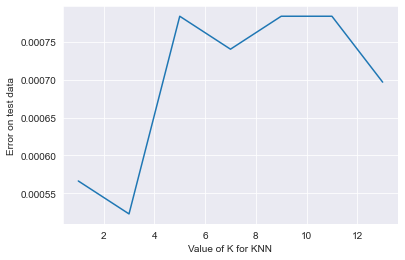

In [91]:
plt.plot(k_val, err)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error on test data')

From the above plot, we should consider K as 3. We have already consider the value of K is 3.

In [137]:
test_data = test_data_pp.copy()

In [138]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[cat_col]))
OH_cols_test  = pd.DataFrame(OH_encoder.transform(test_data[cat_col]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train_data.index
OH_cols_test.index = test_data.index

# One-hot encoding assigns the sequence numbers as the columns names.
OH_cols_train.columns = OH_encoder.get_feature_names()
OH_cols_test.columns  = OH_encoder.get_feature_names()

# Add one-hot encoded columns to imputed numerical features
Final_X_train = pd.concat([train_data[num_col], OH_cols_train], axis=1)
Final_X_test  = pd.concat([test_data[num_col], OH_cols_test], axis=1)

In [139]:
transaction_number_test = test_data_copy.transaction_number
y_pred_KNN=KNN.predict(Final_X_test)
submissions_df = pd.DataFrame({'transaction_number': transaction_number_test, 'is_fraud': y_pred_KNN})
submissions_df.to_csv("submissions2.csv",index=False)

### Tuning XGBoost

In [92]:
xgb_model = XGBClassifier(n_estimators = 1000,
                          learning_rate = 0.05,
                          early_stopping_rounds=5,
                          n_jobs = -1,
                          random_state = 2,
                          verbosity = 0)


# Bundle preprocessing and modeling code in a pipeline
xgb_tune1 = Pipeline(steps=[('Preprocessor', preprocessor),
                              ('model', xgb_model)])
xgb_tune1.fit(X_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num_trf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['money_transacted'], dtype='object')),
                                                 ('cat_trf',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_onehotencode',
                                                                   OneHotEncoder(handle_unknown=...
                  

In [100]:
#Predicting with the linear model
train_pred = xgb_tune1.predict(X_train)
test_pred = xgb_tune1.predict(X_valid)

#Appending metrics in a dataframe

#Metric_append('xgb_tune1_train',y_train,train_pred)
#Metric_append('xgb_tune1_test',y_valid,test_pred)

# Using the function to calculate accuracy, precision and recall.
model_evaluation(y_train, train_pred, y_valid, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53465
           1       0.96      0.97      0.97       105

    accuracy                           1.00     53570
   macro avg       0.98      0.99      0.98     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22910
           1       0.93      0.82      0.87        49

    accuracy                           1.00     22959
   macro avg       0.96      0.91      0.93     22959
weighted avg       1.00      1.00      1.00     22959



In [109]:
transaction_number_test = test_data_copy.transaction_number
y_pred_XGB=xgb_tune1.predict(test_data)

In [110]:
submissions_df = pd.DataFrame({'transaction_number': transaction_number_test, 'is_fraud': y_pred_XGB})

In [111]:
submissions_df.to_csv("submissions1.csv",index=False)

# Get the feature importance

In [170]:
X_train.shape, y_train.shape

((53570, 9), (53570,))

In [171]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cat_col]))
OH_cols_test  = pd.DataFrame(OH_encoder.transform(X_valid[cat_col]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_valid.index

# One-hot encoding assigns the sequence numbers as the columns names.
OH_cols_train.columns = OH_encoder.get_feature_names()
OH_cols_test.columns  = OH_encoder.get_feature_names()

# Add one-hot encoded columns to imputed numerical features
Final_X_train = pd.concat([X_train[num_col], OH_cols_train], axis=1)
Final_X_valid  = pd.concat([X_valid[num_col], OH_cols_test], axis=1)

In [172]:
Final_X_train.shape, y_train.shape

((53570, 84), (53570,))

In [173]:
import shap

xgb_model = XGBClassifier(n_estimators = 1000,
                          learning_rate = 0.05,
                          early_stopping_rounds=5,
                          n_jobs = -1,
                          random_state = 2,
                          verbosity = 0)

xgb_model.fit(Final_X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, random_state=2, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=0)

<AxesSubplot:ylabel='is_fraud'>

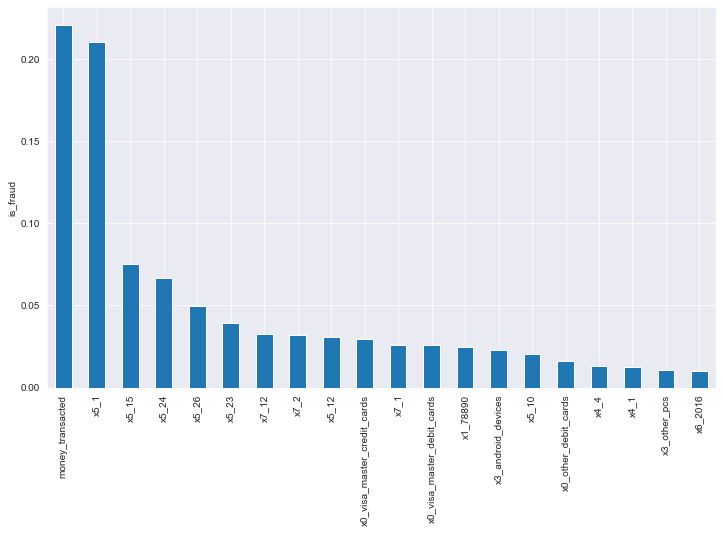

In [203]:
##Feature Importances according to best model XGBOOST

feat_importances = pd.Series(xgb_model.feature_importances_, index = Final_X_train.columns)
feat_importances_ordered = feat_importances.nlargest(n=20)
plt.figure(figsize = (12,7))
plt.ylabel('is_fraud')


feat_importances_ordered.plot(kind='bar')


From the above plot, money_transacted and x5_1 are contributing more than other columns. If the transaction contains huge amount then we can suspect that transaction as fraud.

In [187]:
from lightgbm import LGBMClassifier
lgb2 = LGBMClassifier(n_estimators= 100, random_state=2345,class_weight = 'balanced', max_depth=5, learning_rate = 0.1,bagging_fraction= 0.9)
#param_grid= {'classifier__n_estimators': [100], 'classifier__random_state':[2345], 'classifier__class_weight':['balanced'], 'classifier__max_depth': [5], 'classifier__learning_rate':[0.01,0.25,0.1],
#           'classifier__reg_alpha': [0.3], 'classifier__colsample_bytree': [0.5], 'classifier__bagging_fraction': [0.9]}

#lgb_grid = GridSearchCV(clf_lgb, param_grid= param_grid, cv= 5,n_jobs=6)

lgb2.fit(Final_X_train,y_train)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


LGBMClassifier(bagging_fraction=0.9, class_weight='balanced', max_depth=5,
               random_state=2345)

### Analysis Feature importance using SHAP Analysis.

In [188]:
import shap
explainer = shap.TreeExplainer(model = lgb2)
shap_values_ = explainer.shap_values(Final_X_train)

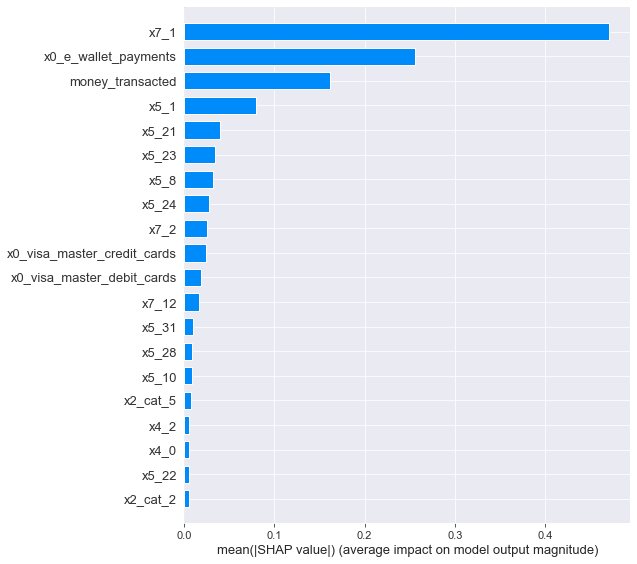

In [194]:
shap.summary_plot(shap_values_[1],Final_X_train,plot_type='bar',show=False)

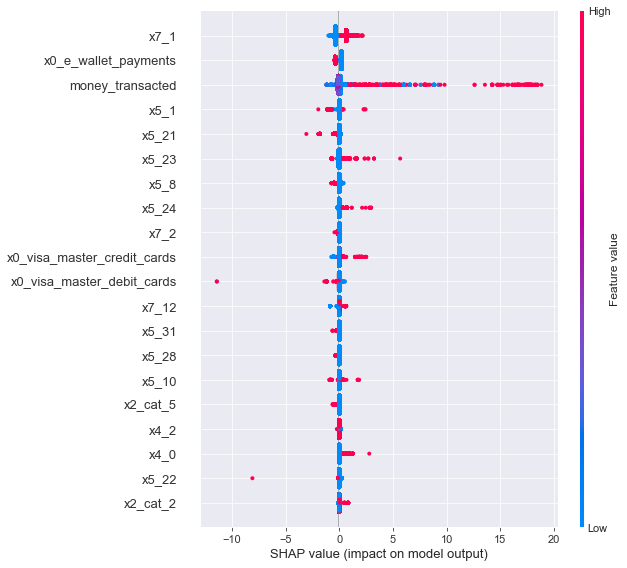

In [195]:
shap.summary_plot(shap_values_[1],Final_X_train,show=False)

With the help of above graph, here are some insights:
- if a transaction happend in the month of January there is high probability that it would become a fraud transaction and in the month of December there is probability that it would become a fraudalent transaction.
- if the transaction has happend through e_wallet_payment then there is less probability that the transaction would be fraud.
- if a transaction has huge amount then there is high probability it would become a fraud.
- if a transaction has happend through visa_master_credit_card then there is a chance that would become a fraud transaction
- if a transaction has happend through visa_master_debit_card then there is a chance that would become a non fraudulent transaction 
- if a transaction has happend from cat_2 in Partner_cat there is a probability it would become fraud.

In [198]:
train_pred = lgb2.predict(Final_X_train)
test_pred = lgb2.predict(Final_X_valid)

#Metric_append('lgb_grid_test',y_train,train_pred)
model_evaluation(y_train, train_pred, y_valid, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53465
           1       0.83      1.00      0.91       105

    accuracy                           1.00     53570
   macro avg       0.91      1.00      0.95     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22910
           1       0.74      0.92      0.82        49

    accuracy                           1.00     22959
   macro avg       0.87      0.96      0.91     22959
weighted avg       1.00      1.00      1.00     22959



Use `SMOTE` from `imblearn.over_sampling` to balance the unbalanced data

In [ ]:
#Oversampling using SMOTE

In [ ]:
smote = SMOTE(random_state=0)

os_data_X,os_data_y=smote.fit_sample(X_train_pp, y_train)

os_data_X = pd.DataFrame(data=os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['is_fraud'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Left_Company']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Left_Company']==0]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Left_Company']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Left_Company']==0])/len(os_data_X))